# Explore the data structure of a dynophore

- A __dynophore__ (defined in the `Dynophore` class) is a collection of so-called __superfeatures__ (defined in the `SuperFeature` class). A superfeature is defined as a pharmacophore feature on ligand site (defined by a feature type, e.g. HBA, and one or more ligand atom numbers/serials) that occurs at least once during and MD simulation. 
- A superfeature can have one or more interaction partner(s) on macromolecule-side. These interaction partners are called __environmental partners__ (defined in the `EnvPartner` class). 
- Each superfeature is described in 3D with a chemical feature point cloud (`ChemicalFeatureCloud3D` class).
- Additionally, the dynophore contains information about the bound ligand in the `Ligand` class.

In this notebook, we will explore the `Dynophore`, `Ligand`, `SuperFeature`, `EnvPartner`, and `ChemicalFeatureCloud3D` classes.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import logging

from dynophores import Dynophore

In [3]:
logger = logging.getLogger("dynophores")
logger.setLevel(logging.DEBUG)

## Set path to `DynophoreApp` output data folder

In [4]:
DATA = Path("../../dynophores/tests/data")
dyno_path = DATA / "out"

## Load data as `Dynophore` object

In [5]:
dynophore = Dynophore.from_dir(dyno_path)

## List object attributes

### `Dynophore` object attributes

In [6]:
dynophore.__dict__

{'id': 'dynophore_1KE7',
 'ligand': <dynophores.core.ligand.Ligand at 0x7efe50678d90>,
 'superfeatures': {'HBA[4618]': <dynophores.core.superfeature.SuperFeature at 0x7efe50673cd0>,
  'AR[4605,4607,4603,4606,4604]': <dynophores.core.superfeature.SuperFeature at 0x7efe506202e0>,
  'HBD[4598]': <dynophores.core.superfeature.SuperFeature at 0x7efe50620490>,
  'HBA[4606]': <dynophores.core.superfeature.SuperFeature at 0x7efe506203d0>,
  'AR[4622,4615,4623,4613,4614,4621]': <dynophores.core.superfeature.SuperFeature at 0x7efdee98ce50>,
  'HBD[4612]': <dynophores.core.superfeature.SuperFeature at 0x7efe40bd4730>,
  'HBA[4619]': <dynophores.core.superfeature.SuperFeature at 0x7efe40bd57f0>,
  'HBA[4596]': <dynophores.core.superfeature.SuperFeature at 0x7efe40bd77c0>,
  'H[4615,4623,4622,4613,4621,4614]': <dynophores.core.superfeature.SuperFeature at 0x7efe40f19880>,
  'H[4599,4602,4601,4608,4609,4600]': <dynophores.core.superfeature.SuperFeature at 0x7efe40efe220>}}

In [7]:
dynophore.__dict__.keys()
# NBVAL_CHECK_OUTPUT

dict_keys(['id', 'ligand', 'superfeatures'])

A `Dynophore` object contains: 

- `id`: Dynophore identifier (name) 
- `ligand`: Ligand information
- `superfeatures`: Superfeature data (`SuperFeature` objects)

In [8]:
print(f"Number of superfeatures: {len(dynophore.superfeatures)}")
# NBVAL_CHECK_OUTPUT

Number of superfeatures: 10


### `Ligand` object attributes

In [11]:
dynophore.ligand.__dict__.keys()
# NBVAL_CHECK_OUTPUT

dict_keys(['name', 'smiles', 'mdl_mol_buffer', 'atom_serials'])

In [12]:
dynophore.ligand.name
# NBVAL_CHECK_OUTPUT

'LS3'

In [13]:
dynophore.ligand.smiles
# NBVAL_CHECK_OUTPUT

'S5(=O)(=O)CC4C(=CC=C(NC=C3C(=O)NC2C3=CC(C1OC=NC=1)=CC=2)C=4)C5'

In [15]:
print(dynophore.ligand.atom_serials)
# NBVAL_CHECK_OUTPUT

[4617, 4604, 4618, 4619, 4596, 4606, 4598, 4612, 4605, 4603, 4597, 4599, 4607, 4613, 4602, 4609, 4615, 4621, 4600, 4614, 4623, 4608, 4601, 4622, 4610, 4616, 4620, 4611, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


**Note**: "-1" in case of atoms without serials (e.g. H atoms)

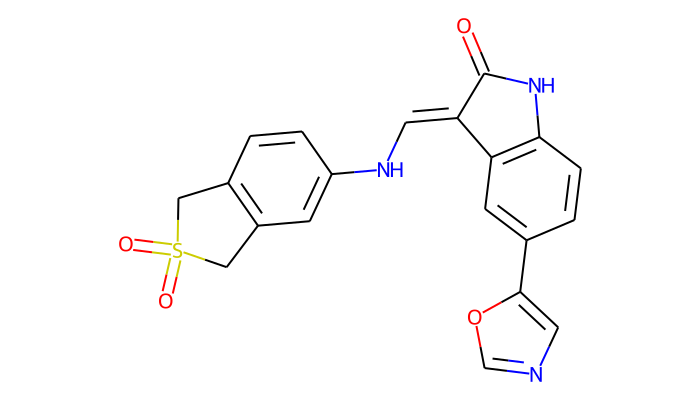

In [19]:
dynophore.ligand.rdkit_molecule()

### `SuperFeature` object attributes

Let's take a look at one example `SuperFeature` object.

In [9]:
superfeature_id = list(dynophore.superfeatures.keys())[0]
superfeature_id

'HBA[4618]'

In [10]:
dynophore.superfeatures

{'HBA[4618]': <dynophores.core.superfeature.SuperFeature at 0x7f050f639f10>,
 'AR[4605,4607,4603,4606,4604]': <dynophores.core.superfeature.SuperFeature at 0x7f050f639dc0>,
 'HBD[4598]': <dynophores.core.superfeature.SuperFeature at 0x7f055986d040>,
 'HBA[4606]': <dynophores.core.superfeature.SuperFeature at 0x7f055986d190>,
 'AR[4622,4615,4623,4613,4614,4621]': <dynophores.core.superfeature.SuperFeature at 0x7f055986d640>,
 'HBD[4612]': <dynophores.core.superfeature.SuperFeature at 0x7f055986dee0>,
 'HBA[4619]': <dynophores.core.superfeature.SuperFeature at 0x7f055986efa0>,
 'HBA[4596]': <dynophores.core.superfeature.SuperFeature at 0x7f0559871f70>,
 'H[4615,4623,4622,4613,4621,4614]': <dynophores.core.superfeature.SuperFeature at 0x7f0559b72070>,
 'H[4599,4602,4601,4608,4609,4600]': <dynophores.core.superfeature.SuperFeature at 0x7f0559b9c9d0>}

In [11]:
dynophore.superfeatures[superfeature_id].__dict__.keys()
# NBVAL_CHECK_OUTPUT

dict_keys(['id', 'feature_type', 'atom_numbers', 'occurrences', 'envpartners', 'color', 'cloud'])

A `SuperFeature` object contains:

- `id`: Superfeature identifier (nomenclature: `<feature_type><list of atom numbers>`)
- `feature_type`: Feature type (e.g. HBA, HBD, H, AR, ...)
- `atom_numbers`: Number(s) of ligand atom(s) that are involved in feature
- `occurrences`: Superfeature occurrences during an MD simulation (0/1 for absent/present)
- `envpartners`: Environmental partners on the macromolecule-side that involved in the superfeature (either at the same time or not)
- `cloud`: Chemical feature cloud in 3D (coordinates of each occurring feature during an MD simulation that belongs to the superfeature)

In [12]:
n_envpartners = sum(
    [len(superfeature.envpartners) for _, superfeature in dynophore.superfeatures.items()]
)
print(f"Number of environmental partners: {n_envpartners}")
# NBVAL_CHECK_OUTPUT

Number of environmental partners: 28


### `EnvPartner` object attributes

Let's take a look at one example `EnvPartner` object.

In [13]:
envpartner_id = list(dynophore.superfeatures[superfeature_id].envpartners.keys())[0]
envpartner_id

'LYS-20-A[316]'

In [14]:
dynophore.superfeatures[superfeature_id].envpartners[envpartner_id].__dict__.keys()
# NBVAL_CHECK_OUTPUT

dict_keys(['id', 'residue_name', 'residue_number', 'chain', 'atom_numbers', 'occurrences', 'distances'])

A `EnvPartner` object contains:

- `id`: environmental partner identifier (nomenclature: `<residue name>-<residue number>-<chain><list of atom numbers>`)
- `residue_name`: residue name
- `residue_number`: residue number
- `chain`: chain ID
- `atom_numbers`: number(s) of residue atom(s) that are involved in feature
- `occurrences`: interaction occurrences during an MD (0/1 for absent/present) between ligand and residue atoms
- `distances`: interaction distances between the involved atoms on ligand- and macromolecule-side during an MD

### `ChemicalFeatureCloud3D` object attributes

In [15]:
dynophore.superfeatures[superfeature_id].cloud.__dict__

{'center': array([-18.507637 ,  -8.405735 ,   1.5362723]),
 'points': [<dynophores.core.chemicalfeaturecloud3dpoint.ChemicalFeatureCloud3DPoint at 0x7f050f639bb0>,
  <dynophores.core.chemicalfeaturecloud3dpoint.ChemicalFeatureCloud3DPoint at 0x7f050f639fd0>]}

In [16]:
dynophore.superfeatures[superfeature_id].cloud.__dict__.keys()
# NBVAL_CHECK_OUTPUT

dict_keys(['center', 'points'])

A `ChemicalFeatureCloud3D` object contains:

- `center`: The coordinates of the geometric center of all points in the point cloud
- `points`: The coordiantes of all points in the point cloud

## Dynophore basics

### Dynophore identifier

In [17]:
print(f"Dynophore name: {dynophore.id}")

Dynophore name: dynophore_1KE7


### Number of frames

In [18]:
print(f"Number of MD simulation frames: {dynophore.n_frames}")

Number of MD simulation frames: 1002


### Number of superfeatures

In [19]:
print(f"Number of superfeatures: {dynophore.n_superfeatures}")

Number of superfeatures: 10


## Superfeatures monitoring (over trajectory)

### Superfeature occurrences

In [20]:
dynophore.superfeatures_occurrences

,"H[4599,4602,4601,4608,4609,4600]","H[4615,4623,4622,4613,4621,4614]",HBA[4596],HBA[4619],HBD[4612],"AR[4622,4615,4623,4613,4614,4621]",HBA[4606],HBD[4598],HBA[4618],"AR[4605,4607,4603,4606,4604]"
0,1,1,1,1,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
997,1,1,1,0,0,0,0,0,0,0
998,1,1,1,0,0,0,0,0,0,0
999,1,1,1,0,0,0,0,0,0,0
1000,1,1,1,0,0,0,0,0,0,0


## Environmental partners monitoring (over trajectory)

### Interaction occurrences for example superfeature

In [21]:
dynophore.envpartners_occurrences_by_superfeature(superfeature_id)

,LYS-20-A[316]
0,0
1,0
2,0
3,0
4,0
...,...
997,0
998,0
999,0
1000,0


In [22]:
dynophore.envpartners_occurrences.keys()

dict_keys(['HBA[4618]', 'AR[4605,4607,4603,4606,4604]', 'HBD[4598]', 'HBA[4606]', 'AR[4622,4615,4623,4613,4614,4621]', 'HBD[4612]', 'HBA[4619]', 'HBA[4596]', 'H[4615,4623,4622,4613,4621,4614]', 'H[4599,4602,4601,4608,4609,4600]'])

### Interaction distances for example superfeature

In [23]:
dynophore.envpartners_distances_by_superfeature(superfeature_id)

,LYS-20-A[316]
0,11.076880
1,11.076880
2,10.654148
3,9.423526
4,12.006125
...,...
997,4.339370
998,5.333941
999,5.336269
1000,4.156338


In [24]:
dynophore.envpartners_distances.keys()

dict_keys(['HBA[4618]', 'AR[4605,4607,4603,4606,4604]', 'HBD[4598]', 'HBA[4606]', 'AR[4622,4615,4623,4613,4614,4621]', 'HBD[4612]', 'HBA[4619]', 'HBA[4596]', 'H[4615,4623,4622,4613,4621,4614]', 'H[4599,4602,4601,4608,4609,4600]'])

## Superfeatures vs. environmental partners

### Occurrence count

In [25]:
dynophore.count

,HBA[4618],"AR[4605,4607,4603,4606,4604]",HBD[4598],HBA[4606],"AR[4622,4615,4623,4613,4614,4621]",HBD[4612],HBA[4619],HBA[4596],"H[4615,4623,4622,4613,4621,4614]","H[4599,4602,4601,4608,4609,4600]"
"ALA-144-A[2263,2266]",0,0,0,0,0,0,0,0,0,992
"ALA-31-A[488,491]",0,0,0,0,0,0,0,0,0,216
ASP-86-A[1313],0,0,0,0,0,0,2,0,0,0
ASP-86-A[1319],0,0,0,0,0,18,0,0,0,0
ASP-86-A[1320],0,0,0,0,0,20,0,0,0,0
GLN-131-A[2057],0,0,0,0,0,1,0,0,0,0
GLN-131-A[2061],0,0,0,0,0,8,0,0,0,0
GLN-131-A[2062],0,0,0,2,0,0,0,0,0,0
GLU-81-A[1228],0,0,8,0,0,0,0,0,0,0
"HIS-84-A[1284,1285,1286,1287,1288]",0,0,0,0,1,0,0,0,0,0


### Occurrence frequency

In [26]:
dynophore.frequency

,HBA[4618],"AR[4605,4607,4603,4606,4604]",HBD[4598],HBA[4606],"AR[4622,4615,4623,4613,4614,4621]",HBD[4612],HBA[4619],HBA[4596],"H[4615,4623,4622,4613,4621,4614]","H[4599,4602,4601,4608,4609,4600]"
"ALA-144-A[2263,2266]",0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,99.00
"ALA-31-A[488,491]",0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,21.56
ASP-86-A[1313],0.0,0.0,0.0,0.0,0.00,0.00,0.20,0.00,0.00,0.00
ASP-86-A[1319],0.0,0.0,0.0,0.0,0.00,1.80,0.00,0.00,0.00,0.00
ASP-86-A[1320],0.0,0.0,0.0,0.0,0.00,2.00,0.00,0.00,0.00,0.00
GLN-131-A[2057],0.0,0.0,0.0,0.0,0.00,0.10,0.00,0.00,0.00,0.00
GLN-131-A[2061],0.0,0.0,0.0,0.0,0.00,0.80,0.00,0.00,0.00,0.00
GLN-131-A[2062],0.0,0.0,0.0,0.2,0.00,0.00,0.00,0.00,0.00,0.00
GLU-81-A[1228],0.0,0.0,0.8,0.0,0.00,0.00,0.00,0.00,0.00,0.00
"HIS-84-A[1284,1285,1286,1287,1288]",0.0,0.0,0.0,0.0,0.10,0.00,0.00,0.00,0.00,0.00


## Superfeature clouds

In [27]:
dynophore.cloud_by_superfeature(superfeature_id)

,x,y,z,frame_ix,weight
0,-18.598375,-8.370245,2.017743,959,1.0
1,-18.416897,-8.441224,1.054801,964,1.0


In [28]:
dynophore.clouds.keys()

dict_keys(['HBA[4618]', 'AR[4605,4607,4603,4606,4604]', 'HBD[4598]', 'HBA[4606]', 'AR[4622,4615,4623,4613,4614,4621]', 'HBD[4612]', 'HBA[4619]', 'HBA[4596]', 'H[4615,4623,4622,4613,4621,4614]', 'H[4599,4602,4601,4608,4609,4600]'])